In [1]:
import yaml
import healpy as hp
import numpy as np
import os
import scipy

from plancklens import utils

from jointmap.plots import CMBLensingPlot 

from delensalot.core import cachers

import os
import numpy as np

from delensalot.core.iterator import statics

import yaml

import matplotlib.pyplot as plt

mpisupport: False, pmisupport: False
disabling mpi
Using lenspyx alm2map


In [2]:
alpha = hp.read_alm("/users/odarwish/scratch/JOINTRECONSTRUCTION/alpha_phi_cmb_new_rot/simswalpha/sim_0000_alpha_lm.fits")
alpha = utils.alm_copy(alpha, 5000)

phi = hp.read_alm("/users/odarwish/scratch/JOINTRECONSTRUCTION/alpha_phi_cmb_new_rot/simswalpha/sim_0000_plm.fits")
phi = utils.alm_copy(phi, 5000)

In [3]:
rec_dir = "/users/odarwish/scratch/JOINTRECONSTRUCTION/alpha_phi_cmb_new_rot_version_mf_test_1_recs/p_p_sim0000mf_test_1/"


ii = 0

plm_rec = np.load(rec_dir + "phi_plm_it000.npy")
plm_rec = np.split(plm_rec, 3)[ii]

read = lambda idx: np.split(np.load(rec_dir + f"plm_gradpdet_it001_sim{2000+idx:04}.npy"), 3)[ii].squeeze()

In [5]:
N = 15
lista = np.cumsum([read(i) for i in range(N)], axis = 0)
denominator = np.cumsum([1 for i in range(N)], axis = 0)
lista = lista/denominator[:, np.newaxis]

In [6]:
grad = np.split(np.load(rec_dir+"plm_gradplik_it000.npy"), 3)[ii]

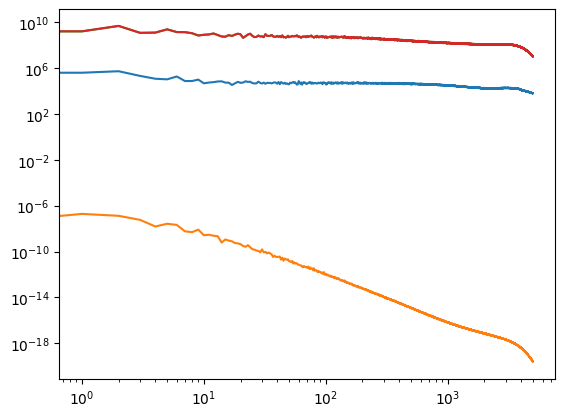

In [7]:
plt.loglog(hp.alm2cl(lista[-1]))
plt.loglog(hp.alm2cl(plm_rec))
plt.loglog(hp.alm2cl(grad+lista[-1]))
plt.loglog(hp.alm2cl(grad))

In [11]:
plm0 = np.load(rec_dir + "phi_plm_it000.npy")
hessian_term = np.load(rec_dir+"hessian/rlm_sn_0_p.npy")
plm1 = plm0 + hessian_term
plm0 = np.split(plm0, 3)[ii]
plm1 = np.split(plm1, 3)[ii]

In [13]:
clcross = hp.alm2cl(plm0, alpha)
clcross1 = hp.alm2cl(plm1, alpha)

claa = hp.alm2cl(alpha)
clauto = hp.alm2cl(plm0)
clauto1 = hp.alm2cl(plm1)

/tmp/ipykernel_32591/445360641.py:1: RuntimeWarning: invalid value encountered in divide
  plt.loglog(clcross/claa)
/tmp/ipykernel_32591/445360641.py:2: RuntimeWarning: invalid value encountered in divide
  plt.loglog(clcross1/claa)


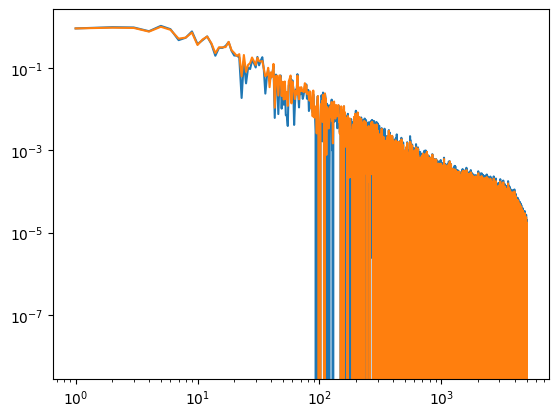

In [14]:
plt.loglog(clcross/claa)
plt.loglog(clcross1/claa)